In [61]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from matplotlib.colors import LogNorm

## Bias Variance Tradeoff

Text(0, 0.5, 'Mean Squ. Error')

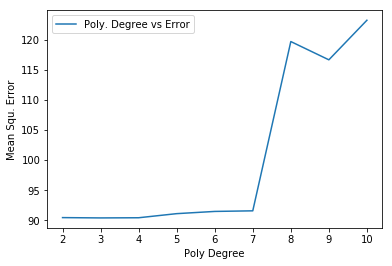

In [62]:
## Poly Degree vs Error

N_train=100

x=np.linspace(0.05,0.95,N_train)
s = np.random.randn(N_train)

# Defining the Polynomial Data
y=2*x**4 + 3*x**3 + 1 + s
xplot=np.linspace(0.02,0.98,N_train)

MSE = []
## Polynomial degree for iteration
degrees = range(2, 11)

for degree in degrees:
    poly = PolynomialFeatures(degree=degree)
    X = poly.fit_transform(x[:,np.newaxis])
    clf = linear_model.LinearRegression()
    clf.fit(X,y)    
    Xplot=poly.fit_transform(xplot[:,np.newaxis])
    MLz  = clf.predict(Xplot)
    mse = np.mean(np.sum((MLz - y)**2))
    MSE.append(mse)

plt.plot(degrees, MSE, label='Poly. Degree vs Error')
plt.legend()
plt.xlabel('Poly Degree')
plt.ylabel('Mean Squ. Error')

Text(0, 0.5, 'Mean Squ. Error')

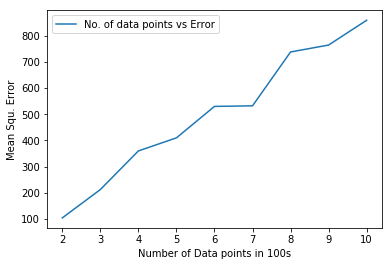

In [63]:
## Error vs data points

MSE = []
N_trains = np.arange(100,1000,100)

for N_train in N_trains:
    x=np.linspace(0.05,0.95,N_train)
    s = np.random.randn(N_train)
    # Some Polynomial
    y=2*x**4 + 3*x**3 + 1 + s
    xplot=np.linspace(0.02,0.98,N_train)
    poly = PolynomialFeatures(degree=5)
    X = poly.fit_transform(x[:,np.newaxis])
    clf = linear_model.LinearRegression()
    clf.fit(X,y)    
    Xplot=poly.fit_transform(xplot[:,np.newaxis])
    MLz  = clf.predict(Xplot)
    mse = np.mean(np.sum((MLz - y)**2))
    MSE.append(mse)

plt.plot(degrees, MSE, label='No. of data points vs Error')
plt.legend()
plt.xlabel('Number of Data points in 100s')
plt.ylabel('Mean Squ. Error')

## Implementing ADAM

In [64]:
## Definiing the function:

def beales_function(x,y):
    f=np.square(1.5-x+x*y)+np.square(2.25-x+x*y*y)+np.square(2.625-x+x*y**3)
    return f

In [65]:
## Defining the gradients:

def grad_beales_function(params):
    x=params[0]
    y=params[1]
    grad_x=2*(1.5-x+x*y)*(-1+y)+2*(2.25-x+x*y**2)*(-1+y**2)+2*(2.625-x+x*y**3)*(-1+y**3)
    grad_y=2*(1.5-x+x*y)*x+4*(2.25-x+x*y**2)*x*y+6*(2.625-x+x*y**3)*x*y**2
    return [grad_x,grad_y]

def contour_beales_function():
    #plot beales function
    x, y = np.meshgrid(np.arange(-10.5, 10.5, 0.01), np.arange(-10.5, 4.5, 0.01))
    fig, ax = plt.subplots(figsize=(10, 10))
    z=beales_function(x,y)
    ax.contour(x, y, z, levels=np.logspace(0, 5, 45), norm=LogNorm(), cmap="RdYlBu_r")
    ax.plot(3,0.5, 'r*', markersize=18)

    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')

    ax.set_xlim((-10.5, 10.5))
    ax.set_ylim((-4.5, 4.5))
    
    return fig,ax

In [66]:
##Implementation of ADAM

def adam(grad, init, n_epochs=5000, eta=10**-3, gamma=0.9,noise_strength=0, epsilon = 10**(-8),beta=0.99):
    params=np.array(init)
    param_traj=np.zeros([n_epochs+1,2])
    param_traj[0,]=init
    v=0
    m=0
    for j in range(n_epochs):
        noise=noise_strength*np.random.randn(params.size)
        m = beta*m + (1 - beta)*(grad(params)+noise)
        v = gamma*v + (1-gamma)*np.power(grad(params)+noise,2)
        m_hat = m / (1 - np.power(beta, j))
        v_hat = v / (1 - np.power(gamma, j))
        params=params-eta*m_hat / (np.sqrt(v_hat) + epsilon)
        param_traj[j+1,]=params
    return param_traj

C:\Users\vip\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in true_divide
  del sys.path[0]
C:\Users\vip\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in true_divide
  
C:\Users\vip\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app


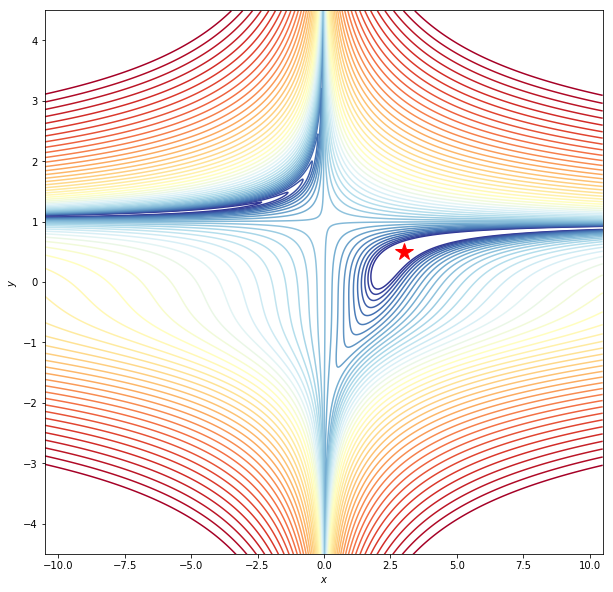

In [67]:
## Plotting of trajectory

def overlay_trajectory_contour_M(ax,trajectory, label,color='k',lw=2):
    xs=trajectory[:,0]
    ys=trajectory[:,1]
    ax.plot(xs,ys, color, label=label,lw=lw)
    ax.plot(xs[-1],ys[-1],color+'>', markersize=14)
    return ax;

#Make static plot of the results
Nsteps=10**4
#lr_l=10**-3
lr=10**-3
init1=np.array([-2,3])

fig1, ax1=contour_beales_function()
adam_trajectory1=adam(grad_beales_function,init1,Nsteps,eta=lr, gamma=0.9,noise_strength=0,epsilon = 10**(-8),beta=0.99)

overlay_trajectory_contour_M(ax1,adam_trajectory1, 'ADAM','k')